# Métodos de Monte Carlo

## Simulação de Monte Carlo

Quando estudamos algumas classes de problemas em em Física, como em mecânica estatística ou em ajuste de modelos a dados empíricos, geralmente descrevemos o sistema físico através de uma PDF, isto é, uma função de densidade de probabilidade. A PDF é uma função dos parâmetros do sistema, por exemplo, a energia de cada molécula num gás, ou os coeficientes de um polinômio usado no ajuste de uma curva. Aproveite para rever o como tratamos o ajuste de uma reta do ponto de vista estatístico, que estudamos numa aula anterior. Como vimos ali, o conjunto de parâmetros forma um espaço abstrato, chamado espaço de parâmetros. Dizemos que uma ponto $\Theta$ neste espaço de parâmetros representa um dos possíveis estados do sistema. No caso do ajuste de uma reta, $\Theta = (a, b)$, os coeficientes linear e angular da reta.

A PDF é dada pela função $p(\Theta)$, tal que a integral de $p(\Theta)$ sobre todo o espaço de parâmetros é 1. Se quisermos conhecer o valor esperado de uma determinada quantidade $x(\Theta)$, função dos parâmetros do sistema, precisamos fazer

\begin{align}
\langle x \rangle_p = \int x(\Theta)\,p(\Theta)\ \mathrm{d} \Theta.
\end{align}

Em geral a PDF é uma função muito complicada, ou mesmo impossivel de calcular analiticamente. Entretanto, veremos que é possível utilizar o método de integração de Monte Carlo para estimar quantidades como $\langle x \rangle_p$.

Historicamente, este tipo de análise surgiu no estudo de sistemas em mecânica estatística, sendo depois adaptado para aplicação a qualquer sistema que possa ser descrito por uma PDF. Apesar disso, vamos tomar licença e começar pelo final.

Suponha que temos um conjunto de observações $D$, e queremos ajustar um determinado modelo composto pelos parâmetros $\Theta$. Nós precisamos saber $p(\Theta | D)$, isto é, qual a probabilidade de cada conjunto de parâmetros $\Theta$ ocorrer, dado que temos as observações $D$. No ajuste minimizando $\chi^2$, encontramos $\Theta$ tal que esta probabilidade é máxima. Aqui, estamos supondo que o modelo é bastante complicado, talque um algoritmo de minimização é inviável. Neste caso, temos que descobrir uma forma de explorar toda a PDF e estimar o valor esperado de observáveis, como a função $x(\Theta)$.

Pelo teorema de Bayes, $p(\Theta | D)$ se relaciona com a probabilidade de um dado model com parâmetros $\Theta$ gerar as observações $D$ através de

\begin{align}
p(\Theta | D) = \frac{p(\Theta)\,p(D|\Theta)}{p(D)},
\end{align}

onde $p(\Theta)$ e $p(D)$ são o *prior*, a probabilidade da ocorrência de $D$ e $\Theta$ sem nenhuma condição, conhecidos *a priori*. Neste caso, o valor de um observável $x(\Theta)$ é dado por

\begin{align}
\langle x \rangle_p = \int x(\Theta)\,p(\Theta|D)\ \mathrm{d} \Theta.
\end{align}

Geralmente $p(\Theta)$ pode ser tomado como constante sem maiores problemas (significando que todos os modelos são igualmente prováveis), ou é conhecido de outros experimentos. Por outro lado, $p(D)$ age como uma constante de normalização (não depende de $\Theta$), mas geralmente é bastante complicado de calcular, ou nem mesmo tem uma forma analítica fechada.

De qualquer forma, mesmo conhecendo $p(\Theta|D)$, esta função geralmente é de uma dimensionalidade muito alta (muitos parâmetros). Esse é o caso típico para uma integração de Monte Carlo. Ficamos tentados tomar $N$ amostras aleatórias e calcular simplesmente

\begin{align}
\langle x \rangle_p \approx \frac 1 N \sum_{i=0}^{N-1} x(\Theta_i)\,p(\Theta_i|D).
\end{align}

Considere, porém, que a grande maioria dos pontos do espaço de parâmetro contribui pouco para a integral. Na verdade, se o modelo é adequado, é bem provável que $p(\Theta|D)$ esteja concentrada numa região muito pequena do espaço de parâmetros. Pode ser até mesmo que nenhum dos $N$ pontos caia dentro desta região! Então, como fazemos?

## Cadeias de Markov

É aí que entra o método *importance sampling*. Veja que $\langle x \rangle_p$ é uma média ponderada. Ora, já vimos o que fazer para calcular esta média, utilizando uma amostragem não-uniforme. Só tem um pequeno problema: precisamos fazer esta amostragem com uma probabilidade $p(\Theta|D)$. Na grande maioria dos casos, sabemos $p(\Theta|D)$, exceto pelos priores, que agem como constantes de normalização. Logo, precisamos de alguma técnica diferente do que já vimos para gerar números aleatórios. Neste caso, o valor esperado de $x(\Theta)$ é simplesmente

\begin{align}
\langle x \rangle_p \approx \frac 1 N \sum_{i=0}^{N-1} x(\Theta_i).
\end{align}

Existe uma técnica chamada *Cadeias de Markov* que, dado um sistema estatístico em equilíbrio termodinâmico, gera uma sequência (ou cadeia) de estados $\Theta_1, \Theta_2, \ldots, \Theta_j$, ocupados pelo sistema. A transição de um estado $\Theta_j$ a outro estado $\Theta_k$ é dado pela matriz de probabilidades de transição $T_{jk}$. Se a matriz de transição obedece o *balanço detalhado*, então pode-se mostrar que a cadeia deve visitar os estados com uma frequência proporcional à PDF do sistema. Isto é, uma sequência suficientemente grande de pontos numa cadeia de Markov é a amostragem que precisamos para estimar $\langle x \rangle_p$.

Mas, o que é esse balanço detalhado? Simplesmente, ele nos diz que a probabilidade de estar no estado $\Theta_j$ e saltar ao estado $\Theta_k$ é igual à probabilidade de estar no estado $\Theta_k$ e saltar ao estado $\Theta_j$. Ou seja,

\begin{align}
p(\Theta_j|D)\, T_{jk} = p(\Theta_k|D)\, T_{kj}.
\end{align}

### Algoritmo de Metropolis–Hastings

Uma forma de fazer saltos que obedecem o balanço detalhado é através do [algoritmo de Metropolis–Hastings](https://pt.wikipedia.org/wiki/Algoritmo_de_Metropolis%E2%80%93Hastings) (MH). Suponha que estamos atualmente no estado $\Theta_j$. Começamos propondo um salto para o estado $\Theta_k$, sorteado de uma distribuição dada por uma *função proposta* $q(\Theta_j, \Theta_k)$. Esta função pode ser qualquer coisa, desde que permita um salto entre quaisquer dois estados do sistema. Pode ser, por exemplo, uma gaussiana centrada em $\Theta_j$.

Dado este salto proposto, ele é aceito com base na probabilidade de aceitação

\begin{align}
P_a(\Theta_j, \Theta_k) = \frac{p(\Theta_k|D)\,q(\Theta_j, \Theta_k)}{p(\Theta_j|D)\,q(\Theta_k, \Theta_j)}.
\end{align}

Dependendo do salto e da função proposta, esta quantidade $P_a$ pode ser maior que 1. Neste caso, o passo é aceito incondicionalmente. Se não, o salto é dado com probabilidade $P_a$. Isso é equivalente a ter uma probabilidade de transição

\begin{align}
T_{jk} = q(\Theta_k, \Theta_j)\ P_a(\Theta_j, \Theta_k),
\end{align}

que vai obedecer o balanço detalhado (para uma demonstração, veja a seção 15.8.1 da terceira edição do Numerical Recipes).

Se o salto não foi aceito, não tem problema, o sistema permanece no estado em que está (é como um salto para o mesmo estado). Este é o algoritmo MH, resta apenas escolher uma função proposta adequada ao nosso problema.

Vamos substituir as probabilidades dos modelos em $P_a$ e usar o teorema de Bayes para simplificar o problema.

\begin{align}
P_a &= \frac{p(\Theta_k|D)\,q(\Theta_j, \Theta_k)}{p(\Theta_j|D)\,q(\Theta_k, \Theta_j)} \\
&= \frac{q(\Theta_j, \Theta_k)}{q(\Theta_k, \Theta_j)}\ p(\Theta_k|D)\frac{1}{p(\Theta_j|D)}  \\
&= \frac{q(\Theta_j, \Theta_k)}{q(\Theta_k, \Theta_j)}\ \frac{p(\Theta_k)\,p(D|\Theta_k)}{p(D)}\frac{p(D)}{p(\Theta_j)\,p(D|\Theta_j)} \\
\implies P_a &= \frac{q(\Theta_j, \Theta_k)}{q(\Theta_k, \Theta_j)}\ \frac{p(\Theta_k)\,p(D|\Theta_k)}{p(\Theta_j)\,p(D|\Theta_j)}.
\end{align}

Quase que como mágica, desaparecemos com o termo problemático $p(D)$. O que sobrou foi o prior $p(\Theta)$, que é conhecido, e a probabilidade obter as observações $D$ dados os parâmetros $\Theta$. Este último nós já calculamos quando fizemos o ajuste linear,

\begin{align}
p(D|\Theta) = \exp \left[-\frac 1 2 \chi^2(\Theta) \right],
\end{align}

onde o $\chi^2$ é a figura de mérito do modelo. Então,

\begin{align}
P_a &= \frac{q(\Theta_j, \Theta_k)}{q(\Theta_k, \Theta_j)}\ \frac{p(\Theta_k)\,p(D|\Theta_k)}{p(\Theta_j)\,p(D|\Theta_j)} \\
&= \frac{q(\Theta_j, \Theta_k)}{q(\Theta_k, \Theta_j)}\ \frac{p(\Theta_k)}{p(\Theta_j)}\frac{\exp \left[-\frac 1 2 \chi^2(\Theta_k) \right]}{\exp \left[-\frac 1 2 \chi^2(\Theta_j) \right]} \\
\implies P_a &= \frac{q(\Theta_j, \Theta_k)}{q(\Theta_k, \Theta_j)}\ \frac{p(\Theta_k)}{p(\Theta_j)} \exp \left\{-\frac 1 2 \left[\chi^2(\Theta_k) - \chi^2(\Theta_j)\right]\right\}.
\end{align}

### Implementando MH

O resultado que obtivemos acima vale em termos gerais. Para resolver um problema específico, precisamos conhecer (ou escolher):

- O prior $p(\Theta)$;
- A função proposta $q(\Theta_j, \Theta_k)$, usada como uma função e como distribuição para gerar números aleatórios;
- A figura de mérito do modelo, $\chi^2(\Theta)$.

Veja que qualquer função proposta simétrica nos termos $j$ e $k$ vai fazer

$$
\frac{q(\Theta_j, \Theta_k)}{q(\Theta_k, \Theta_j)}\ = 1.
$$

Um salto muito frequentemente usado é o salto gaussiano, onde $q(\Theta_j, \Theta_k)$ é uma gaussiana centrada em $\Theta_j$, que é simétrica em $j$ e $k$. Praticamente toda biblioteca numérica tem um gerador de números aleatórios com distribuição Normal, portanto não deve ser um problema.

Para simplificar ainda mais, vamos admitir um prior uniforme. Ou seja, todos os estados $\Theta$ possíveis do sistema são igualmente prováveis. Ficamos então com

\begin{align}
P_a &= \exp \left\{-\frac 1 2 \left[\chi^2(\Theta_k) - \chi^2(\Theta_j)\right]\right\}.
\end{align}

Esta função seria maior ou igual a 1 se $\chi^2(\Theta_k) \leq \chi^2(\Theta_j)$. Neste caso, $T_{jk} = 1$, o que em outras palavras nos diz que qualquer passo que diminua o $\chi^2$ é imediatamente aceito. Mas, passos que aumentam o $\chi^2$ (ajustes piores) também podem ser aceitos, com uma probabilidade que cai exponencialmente com o aumento do $\chi^2$. De qualquer forma, essa verificação vai facilitar a vida na hora de programar.

A nossa simulação de Monte Carlo usando cadeias de Markov se resume nos seguintes passos:

1. Escolha um estado inicial $\Theta_j$.

2. Use a *função proposta* e sorteie um salto para $\Theta_k$ com probabilidade homogênea para um novo estado.

3. Se $\chi^2(\Theta_k) \leq \chi^2(\Theta_j)$
    - O salto é aceito, $\Theta_j \to \Theta_k$.
4. Se não
    - calcule a probabilidade de aceitação $P_a$ do salto.
    - Sorteie de forma homogênea um número $r$ no intervalo $[0, 1)$. 
    - Se $r < P_a$
        - O salto é aceito, $\Theta_j \to \Theta_k$. 
    - Se não
        - O salto não é aceito, $\Theta_j \to \Theta_j$.
5. Guarde o valor $\Theta_j$ no array de estados.      
6. Repita a partir de 2.

A cada passo vamos calculando $x(\Theta)$, e acumulando o seu somatório. No final, teremos $N$ amostras $\Theta_j$, e o valor esperado $\langle x \rangle_p$ será

\begin{align}
\langle x \rangle_p = \frac 1 N \sum_{j=0}^{N - 1} x(\Theta_j).
\end{align}

### Exercício

Vamos repetir o problema do ajuste da lei de Hooke a medidas experimentais. Temos massas $m_i$, penduramos as massas numa mola de constante elástica desconhecida $k$, ela distende até uma posição $l_i$. Queremos descobrir qual a constante elástica da mola. Usando a Lei de Hooke como modelo, segue que

\begin{align}
l_i &= \frac{g}{k} m_i = b m_i \\
\implies l(\Theta) &= a + b m.
\end{align}

Ou seja, $l$ é função linear da massa $m$, com parâmetros $\Theta = (a, b)$. Os dados experimentais são

In [1]:
import numpy as np

# Medidas experimentais
m_exp = np.array([2.0, 4.0, 6.0, 8.0, 10.0]) # kg
l_exp = np.array([42.0, 48.4, 51.3, 56.3, 58.6]) # cm
s_exp = np.array([1.0, 1.0, 1.0, 1.0, 1.0]) # cm

#### Item 1

A figura de mérito do modelo linear é o $\chi^2$, dado por

\begin{align}
\chi^2(\Theta) = \sum_{i=0}^{M-1} \frac{(l_i - a - b m_i)^2}{\sigma_i^2}.
\end{align}

Vamos armazenar os parâmetros $\Theta = (a, b)$ num array de dois elementos. Defina a função $\chi^2$ abaixo.

In [2]:
def calc_chi2(theta):

    M = len(m_exp)
    chi2 = 0
    a,b = theta

    for i in range(M):
        chi2 += (l_exp[i] - a -b*m_exp[i])**2/s_exp[i]

    return chi2

O resultado da célula abaixo deve ser $\approx 6.7$.

In [4]:
theta_teste = np.array([40, 2])
calc_chi2(theta_teste)

6.6999999999999975

#### Item 2

Vamos escolher o salto proposto com base numa distribuição gaussiana. Porém, os valores de $a$ e $b$ são de dimensões diferentes. Precisamos estabelecer uma escala para cada parâmetro, quer dizer, qual a variância (largura) da gaussiana naquela dimensão. Reveja o notebook sobre ajuste linear, e determine visualmente uma variância para cada um dos parâmetros.

Escreva abaixo a função proposta. Ela vai escolher um novo par de parâmetros $\Theta_k$ a partir do $\Theta_j$ passado como argumento. A função deve retornar um array como o ``theta_teste`` definido no item anterior. Uma função que gera números aleatórios com distribuição gaussiana é a `np.random.randn()`. Leia a sua documentação para entender como usá-la.

In [5]:
def proposta(theta_j):
    a,b = theta_j

    escala_a, escala_b = 1, 0.2

    varA = escala_a *np.random.randn()
    varB = escala_b*np.random.randn()

    a_k = a + varA
    b_k = b + varB

    return np.array([a_k,b_k])

Esta célula deve retornar um array do tipo `array([42.57162026,  2.85726059])`, com valores próximos a `theta_teste`.

In [6]:
proposta(theta_teste)

array([39.79327012,  2.48272375])

#### Item 3

Queremos estudar a constante elástica da mola, logo esta vai ser a função que queremos integrar,

\begin{align}
k(\Theta) &= \frac{g}{b} \\
\langle k \rangle_p &= \int k(\Theta)\,p(\Theta|D)\ \mathrm{d} \Theta \approx \frac 1 N \sum_{j=0}^{N-1} k(\Theta_j).
\end{align}

Escreva a função que calcula $k$ dado um array $\Theta$.

In [7]:
def calc_k(theta):
    b = theta[1]
    g = 979.15

    return g/b

O resultado da célula abaixo deve ser $\approx 4.9$.

In [8]:
calc_k(theta_teste)

489.575

#### Item 4

Faremos 100 mil saltos, e vamos guardar $\Theta_j$ e $k(\Theta_j)$ de todos os passos.

In [9]:
N = 100000
theta = np.zeros((N, 2))

A posição inicial poderia ser sorteada com a própria função proposta, mas vamos escolher um valor fixo, $\Theta_0 = (40, 1)$, isto é, $a = 40$ e $b = 1$.

In [10]:
theta_j = np.array([40.0, 1.0])

chi2_j = calc_chi2(theta_j)

Escreva o código que faz a simulação, com base no algoritmo descrito na discussão teórica.

In [17]:
def simulacao(theta):

    theta_k = proposta(theta)

    if calc_chi2(theta_k) <= calc_chi2(theta):
        theta = theta_k
    
    else:
        prob_a = np.exp(-0.5* (calc_chi2(theta_k) - calc_chi2(theta)))
        r = np.random.uniform()

        if r < prob_a:
            theta = theta_k

        else:
            theta = theta

    return theta



In [47]:
theta = theta_j
estados_vazio_a = np.zeros(N)
estados_vazio_b = np.zeros(N)
k = np.zeros(N, dtype= "float64")
k_lista = np.zeros(N)

for i in range(N):
    theta = simulacao(theta)
    k[i] = calc_k(theta)
    estados_vazio_a[i] = theta[0]
    estados_vazio_b[i] = theta[1]

In [48]:
estados_vazio_a

array([40.        , 40.        , 40.        , ..., 38.38912691,
       38.38912691, 38.38912691])

In [49]:
estados_vazio_b

array([1.        , 1.        , 1.        , ..., 2.22580086, 2.22580086,
       2.22580086])

In [50]:
k

array([979.15     , 979.15     , 979.15     , ..., 439.9090765,
       439.9090765, 439.9090765])

In [60]:
theta

array([38.38912691,  2.22580086])

#### Item 5

Calcule o valor esperado da constante elástica da mola. O valor deve ser em torno de $480$.

In [53]:
k_esperado = calc_k(theta)
k_esperado

439.9090764978082

#### Item 6

Nós guardamos os parâmetros $\Theta_i$ num array. Isto não é necessário se quisermos simplesmente calcular $\langle k \rangle$. Porém, com os parâmetros armazenados, podemos calcular posteriormente o valor esperado de *qualquer* outra função de $\Theta$.

Calcule o valor esperado dos parâmetros $a$ e $b$.

In [56]:
aa = 0
bb = 0
for i in range(N):
    aa += estados_vazio_a[i]
    bb += estados_vazio_b[i]

a = aa/N
b = bb/N
print(a,b)

38.99987495610105 2.0535774373930487


As vantagens não param por aí. Lembre que a densidade de pontos amostrados é proporcional à PDF do modelo. Assim, podemos ver de forma aproximada a PDF de $k$ fazendo um histograma das amostras. A linha vertical é o valor esperado de $k$.

In [57]:
# Inicialização
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

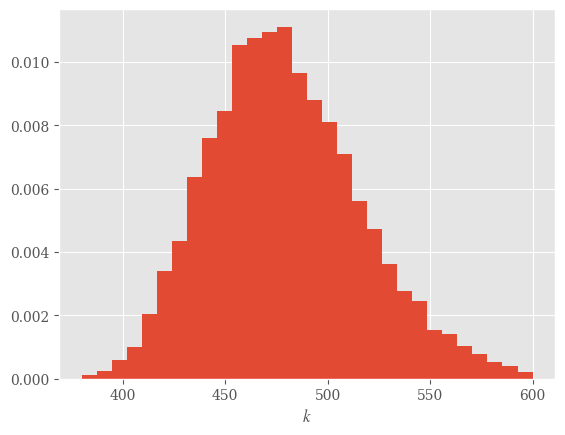

In [58]:
fig, ax = plt.subplots()
ax.hist(k, range=[380, 600], bins=30, density=True)
ax.set_xlabel('$k$')
plt.show()

A distribuição de $k$ é bem comportada, e tem somente um pico bem definido. Isso nem sempre é assim, é importante olhar o histograma para detectar problemas com o modelo, como picos múltiplos, ou distribuições assimétricas, por exemplo. Vejamos o histograma 2-d de $a$ contra $b$.

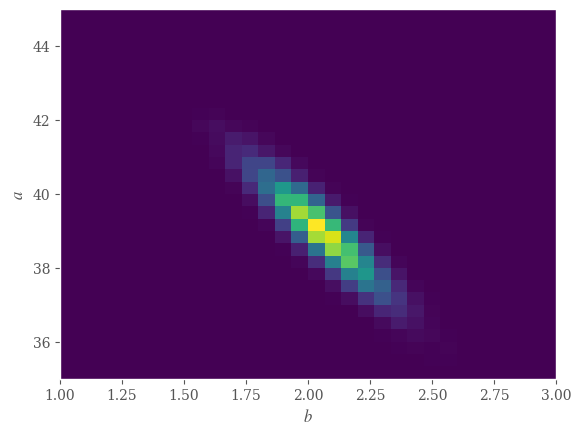

In [61]:
fig, ax = plt.subplots()
ax.hist2d(estados_vazio_b, estados_vazio_a, range=[[1.0, 3.0],[35.0, 45.0]], bins=30)
ax.set_xlabel('$b$')
ax.set_ylabel('$a$')
plt.show()

Podemos ver que a cadeia tende a ficar concentrada numa região. Este histograma também mostra como $a$ e $b$ estão anti-correlacionados. Esta é a grande vantagem do método de Monte Carlo com cadeias de Markov, obtemos não simplesmente um melhor modelo, mas uma aproximação da própria PDF do modelo!

Pra finalizar, a título de curiosidade, vamos ver o caminho percorrido pela cadeia de Markov. Ele é parecido com a caminhada aleatória que estudamos anteriormente, mas com valores contínuos e probabilidades um pouco mais complicadas. Os contornos correspondem a curvas de nível do histograma 2-d acima.

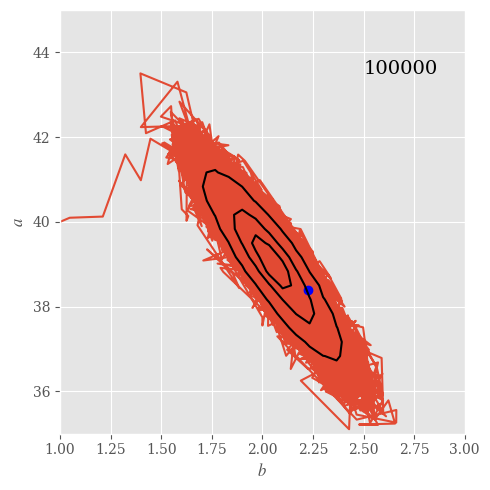

In [68]:
fig, ax = plt.subplots(figsize=[5,5])

# Contornos da PDF.
h, xe, ye = np.histogram2d(estados_vazio_b, estados_vazio_a, range=[[1.0, 3.0],[35.0, 45.0]], bins=30)
xc = (xe[:-1] + xe[1:]) / 2.0
yc = (ye[:-1] + ye[1:]) / 2.0
ax.contour(xc, yc, h.T, levels=[500, 2000, 3500], colors='k', zorder=10)

# Caminho da cadeia.
l, = ax.plot(estados_vazio_b, estados_vazio_a, lw=1.5)
f, = ax.plot([estados_vazio_b[-1]], [estados_vazio_a[-1]], 'bo')

t = ax.text(0.75, 0.85, f'{N}', transform=ax.transAxes, size=14)
ax.set_xlabel('$b$')
ax.set_ylabel('$a$')
ax.set_xlim(1, 3)
ax.set_ylim(35, 45)
fig.set_tight_layout(True)
plt.show()

Podemos visualizar melhor com uma animação. O script abaixo faz uma animação em video HTML5 dos 10 mil primeiros passos, saltando de 5 em 5. Pode ser necessário instalar o pacote `ffmpeg`, com o comando:

```
conda install ffmpeg
```

In [4]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'

def animate(i):
    i *= 1
    l.set_data(estados_vazio_b[i+1], estados_vazio_a[i+1])
    f.set_data([estados_vazio_b[i]], [estados_vazio_a[i]])
    t.set_text(f'{i}')
    return (l, f, t)

anim = FuncAnimation(fig, animate, frames=30 * 60, interval=1000 * 1/60, blit=True)
HTML(anim.to_html5_video())

NameError: name 'fig' is not defined

Uma coisa que chama bastante a atenção é como a cadeia fica parada em alguns pontos. Lembre-se de que os saltos não são obrigatórios, eles têm uma probabilidade $P_a$ de ocorrer. Quando a cadeia está próxima ao valor mais provável, a maioria das propostas aumenta o $\chi^2$, e tem baixa probabilidade de ser aceita. É possível melhorar a aceitação modificando os fatores de escala usados na função proposta. Também, existem funções de proposta mais eficientes; encontrar a função proposta ideal para cada modelo é essencialmente uma arte.

De qualquer maneira, a menos que tenhamos algum problema sério com a função proposta, ou com o modelo (e consequentemente com a figura de mérito), dado um número grande de passos $N$, a cadeia vai amostrar o espaço de parâmetros bem o suficiente para que tenhamos uma estimativa da PDF dos observáveis desejados. No caso do nosso exemplo, não sabemos apenas o "melhor valor" da constante elástica da mola, ou o seu valor mais provável, ou uma barra de erro. Temos acesso a uma PDF aproximada, que descreve totalmente esse valor.

Para finalizar, existe um pacote chamado [`emcee`](https://emcee.readthedocs.io/en/stable/index.html) que permite fazer modelagem com MCMC muito facilmente. Esse pacote implementa várias funções proposta diferentes, entre elas a que estudamos aqui. Para mais detalhes sobre os algoritmos, veja o [artigo publicado por eles](https://arxiv.org/abs/1202.3665).